#### 서울시 구별 CCTV 현황 분석하기
- 서울시 각 구별 CCTV수 파악
- 인구대비 CCTV 비율 파악 순위 비교
- 인구대비 CCTV 예측치를 확인하여, CCTV가 부족한 구를 확인해보자.

#### CSV파일 읽기 - 서울시 구별 CCTV 현황

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CCTV_Seoul = pd.read_csv('./data/CCTV_in_Seoul.csv', encoding='UTF-8')
CCTV_Seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


#####  컬럼명 변경

In [3]:
CCTV_Seoul.columns[0]

'기관명'

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구 별'}, inplace = True)

In [5]:
CCTV_Seoul

,구 별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


#### 엑셀파일 읽기 - 서울시 인구 현황

In [6]:
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls')
pop_Seoul

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


- header : 읽고 싶은 row index(0부터 시작)
- usecols : 읽고 싶은 column 선택

In [7]:
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls', header = 2, usecols="B,D,G,J,N")
pop_Seoul

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


#####  컬럼명 변경하기


In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0]:'구 별',
                          pop_Seoul.columns[1]:'인구수',
                          pop_Seoul.columns[2]:"한국인",
                          pop_Seoul.columns[3]:"외국인",
                          pop_Seoul.columns[4]:"고령자"}, inplace = True)
pop_Seoul

,구 별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


#### 서울시 각 구별 CCTV수 파악

In [9]:
g = CCTV_Seoul
g.sort_values(by = "소계", ascending=False) # 소계를 기준으로 정렬
                        # ascending = False : 내림차순

,구 별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


#### 최근 3년동안 CCTV가 많이 설치된 지역을 알아보자.

In [10]:
g['최근 3년 증가율'] = (g['2016년']+g['2015년']+g['2014년']) / g['2013년도 이전'] *100

In [11]:
g.sort_values(by = "최근 3년 증가율", ascending = False)

,구 별,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


#### 서울시 인구데이터 파악하기

In [12]:
p = pop_Seoul.head()
p

,구 별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구 별     5 non-null      object 
 1   인구수     5 non-null      float64
 2   한국인     5 non-null      float64
 3   외국인     5 non-null      float64
 4   고령자     5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 328.0+ bytes


#### 결측치 확인하기

In [14]:
pop_Seoul['구 별'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구 별, dtype: bool

In [15]:
pop_Seoul.drop([26], inplace = True)
pop_Seoul

,구 별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [16]:
pop_Seoul.drop([0], inplace=True)

In [17]:
pop_Seoul

,구 별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [18]:
x = pop_Seoul

#### 인구수 대비 외국인의 비율이 높은 구와 고령자의 비율이 높은 구를 구해보자

In [19]:
x['인구수대비 외국인비율']= (x['외국인']/ x['인구수'])*100

In [20]:
x['인구수대비 고령자비율']= (x['고령자']/ x['인구수'])*100

In [21]:
x

,구 별,인구수,한국인,외국인,고령자,인구수대비 외국인비율,인구수대비 고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


#### CCTV 데이터와 인구 데이터 합치고 분석하기

In [22]:
g_set = set(g['구 별'].unique())
g_set

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [23]:
x_set = set(x['구 별'].unique())
x_set

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [24]:
g_set - x_set

set()

In [25]:
data = pd.merge(g,x,on='구 별')

In [26]:
data.corr()

,소계,2013년도 이전,2014년,2015년,2016년,최근 3년 증가율,인구수,한국인,외국인,고령자,인구수대비 외국인비율,인구수대비 고령자비율
소계,1.000000,0.862756,0.450062,0.624402,0.593398,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
2013년도 이전,0.862756,1.000000,0.121888,0.257748,0.355482,-0.652747,0.168177,0.163142,0.048973,0.105379,-0.038732,-0.257255
2014년,0.450062,0.121888,1.000000,0.312842,0.415387,0.341291,0.027040,0.025005,0.027325,0.010233,0.050834,0.027128
2015년,0.624402,0.257748,0.312842,1.000000,0.513767,0.112479,0.368912,0.363796,0.013301,0.372789,-0.128952,-0.217863
2016년,0.593398,0.355482,0.415387,0.513767,1.000000,0.312985,0.144959,0.145966,-0.042688,0.065784,-0.020160,-0.139364
최근 3년 증가율,-0.343016,-0.652747,0.341291,0.112479,0.312985,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,0.168177,0.027040,0.368912,0.144959,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,0.163142,0.025005,0.363796,0.145966,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,0.048973,0.027325,0.013301,-0.042688,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,0.105379,0.010233,0.372789,0.065784,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468


In [27]:
del data['2013년도 이전']
del data['2014년']
del data['2015년']
del data['2016년']

data.head()

,구 별,소계,최근 3년 증가율,인구수,한국인,외국인,고령자,인구수대비 외국인비율,인구수대비 고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [28]:
data.set_index('구 별', inplace = True)
data

,소계,최근 3년 증가율,인구수,한국인,외국인,고령자,인구수대비 외국인비율,인구수대비 고령자비율
구 별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


#### Scatter plot 시각화

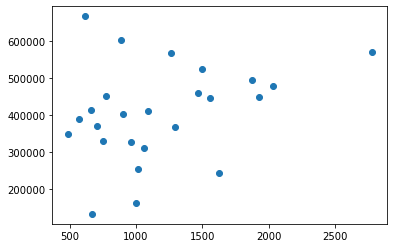

In [29]:
plt.scatter(data['소계'], data['인구수'])
plt.show()

####  CCTV와 인구현황 분석하기

##### 인구수대비 CCTV 설치수가 많은 지역/ 적은지역을 알아보자

In [30]:
data['인구수대비CCTV설치횟수'] = (data['소계']/data['인구수']) * 100
data.sort_values(by = '인구수대비CCTV설치횟수', ascending = False)

,소계,최근 3년 증가율,인구수,한국인,외국인,고령자,인구수대비 외국인비율,인구수대비 고령자비율,인구수대비CCTV설치횟수
구 별,,,,,,,,,
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020
종로구,1002,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,0.615404
중구,671,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,0.503603
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.397911
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852
동대문구,1294,74.766355,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322,0.350207


In [31]:
from matplotlib import font_manager, rc

In [32]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
font_name
rc('font',family = font_name)

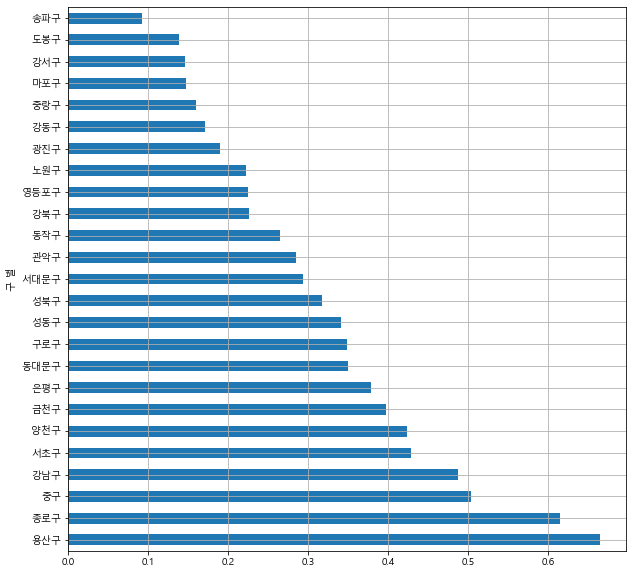

In [33]:
data['인구수대비CCTV설치횟수'].sort_values(ascending=False).plot(kind = 'barh', 
                                                        grid=True, figsize = (10,10))
plt.show()

#### 인구대비 cctv비율 예측 값 만들기

In [34]:
from sklearn.linear_model import LinearRegression # 선형회귀 알고리즘

In [35]:
l_model = LinearRegression()

In [39]:
l_model.fit(data[['인구수']], data['소계'])

LinearRegression()

In [41]:
predict_CCTV = l_model.predict(data[['인구수']])
predict_CCTV

array([1391.94464487, 1238.42289235, 1077.34202601, 1435.50315451,
       1333.05189553, 1132.29026377, 1231.40708166,  979.01070661,
       1390.48361768, 1101.50134126, 1128.79741381, 1185.12289226,
       1155.18099895, 1073.3765678 , 1234.59620553, 1052.53598367,
       1248.93155299, 1518.91131175, 1273.43648757, 1172.64001207,
        964.76830981, 1292.30154299,  858.22460369,  819.4995281 ,
       1187.71896477])

In [44]:
data['CCTV 오차'] = np.abs(data['소계'] - predict_CCTV)

In [45]:
data.sort_values(by = 'CCTV 오차', ascending=False)

,소계,최근 3년 증가율,인구수,한국인,외국인,고령자,인구수대비 외국인비율,인구수대비 고령자비율,인구수대비CCTV설치횟수,CCTV 오차
구 별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690
도봉구,485,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.139110,616.501341
마포구,574,212.101911,389649.0,378566.0,11083.0,48765.0,2.844355,12.515110,0.147312,581.180999
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.378852,580.698457
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155


#### 최종결과 시각화

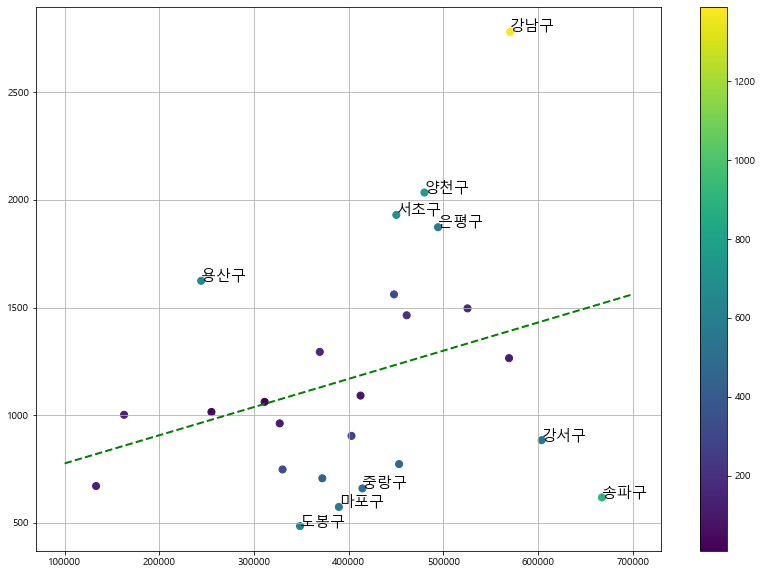

In [60]:
plt.figure(figsize = (14,10)) # 가로, 세로
plt.scatter(data['인구수'], data['소계'], c= data['CCTV 오차'], s=50) #s:마커크기
fx = np.linspace(100000, 700000, 100) #100개의 구간으로 나뉘게 되고 각 구간은 똑같은 간격
fy = l_model.predict(fx.reshape(-1,1))
plt.plot(fx, fy, ls = 'dashed', color = 'green', lw = 2)

#오차가 큰 상위 10개 지역 이름표기
error_10 = data.sort_values(by = 'CCTV 오차', ascending = False).head(10)
for i in range(10):
    plt.text(error_10['인구수'][i], error_10['소계'][i], error_10.index[i], fontsize = 15)
plt.colorbar()
plt.grid()
plt.savefig('./CCTV_result.png')
plt.show()

In [51]:
fx.reshape(-1,1)

array([[100000.        ],
       [106060.60606061],
       [112121.21212121],
       [118181.81818182],
       [124242.42424242],
       [130303.03030303],
       [136363.63636364],
       [142424.24242424],
       [148484.84848485],
       [154545.45454545],
       [160606.06060606],
       [166666.66666667],
       [172727.27272727],
       [178787.87878788],
       [184848.48484848],
       [190909.09090909],
       [196969.6969697 ],
       [203030.3030303 ],
       [209090.90909091],
       [215151.51515152],
       [221212.12121212],
       [227272.72727273],
       [233333.33333333],
       [239393.93939394],
       [245454.54545455],
       [251515.15151515],
       [257575.75757576],
       [263636.36363636],
       [269696.96969697],
       [275757.57575758],
       [281818.18181818],
       [287878.78787879],
       [293939.39393939],
       [300000.        ],
       [306060.60606061],
       [312121.21212121],
       [318181.81818182],
       [324242.42424242],
       [3303